In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
t = np.linspace(0,50,N)
h = t[1] - t[0]


In [2]:
def func(X):
	X1, X2, Vx1, Vx2 = X
	dx1 = Vx1
	dx2 = Vx2
	
	diff_x1 = X1-L
	diff_x2 = (X2-X1)-L
	diff_x3 = 3*L-X2 
	
	w = np.sqrt(k/m)
	dvx1 = -w**2*diff_x1 + w**2*diff_x2
	dvx2 = -w**2*diff_x2 + w**2*diff_x3
	
	return np.array([dx1, dx2, dvx1, dvx2])

In [3]:
def RK4(X,h):
	X  = np.array(X)
	K1 = h*func(X)
	K2 = h*func(X+K1/2)
	K3 = h*func(X+K2/2)
	K4 = h*func(X+K3)
	
	return X + (K1+2*K2+2*K3+K4)/6

In [4]:
x1  = np.zeros(N)
x2  = np.zeros(N)
vx1 = np.zeros(N)
vx2 = np.zeros(N)

k = 4.
m = 1.
L = 1.
x1[0]  = L*1.2
x2[0]  = x1[0] + 0.5*L
vx1[0] = 0
vx2[0] = 0

In [5]:
for i in range(1,N):	
	X0 = x1[i-1], x2[i-1], vx1[i-1], vx2[i-1]
	x1[i], x2[i], vx1[i], vx2[i] = RK4(X0,h)

In [6]:
from scipy.integrate import odeint

def func2(X,t):
	return func(X)

In [7]:
fig = plt.figure()

l1 = np.zeros(N)
l2 = np.ones(N)*L
l3 = np.ones(N)*2*L
l4 = np.ones(N)*3*L

<Figure size 432x288 with 0 Axes>

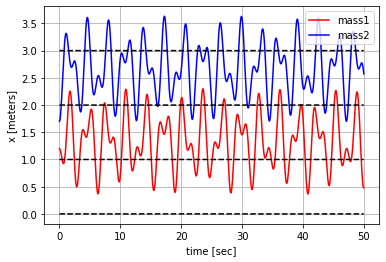

In [8]:
plt.plot(t,x1,'r-',label='mass1')
plt.plot(t,x2,'b-',label='mass2')

plt.plot(t,l1,'k--')
plt.plot(t,l2,'k--')
plt.plot(t,l3,'k--')
plt.plot(t,l4,'k--')

plt.grid() ; plt.legend()
plt.xlabel('time [sec]')
plt.ylabel('x [meters]')

plt.show()